

# **COVID-19 dataset**
 

The US counties COVID 19 dataset, and the dataset is from [here](https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset).


In [1]:


import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
os.environ['KAGGLE_USERNAME']='tszyiyeung'
os.environ['KAGGLE_KEY']='dfe9d0ffd561ad644c090ddf2c05319b'

In [ ]:
! kaggle datasets download -d fireballbyedimyrnmom/us-counties-covid-19-dataset


us-counties-covid-19-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Next, unzip the file and read the contents into a DataFrame.

In [ ]:
! unzip us-counties-covid-19-dataset


covidCase = pd.read_csv("us-counties-covid-19-dataset")

Archive:  us-counties-covid-19-dataset.zip
replace us-counties.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Next, let us take a first look at the data.  Display the first 10 data

In [ ]:
covidCase.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


## Now we need to clean the data, by drop 'fips' colum


In [ ]:
covidCase.drop(columns=['fips'], inplace=True)

Newest case

In [ ]:
newest_date = covidCase['date'].max()
case1 = covidCase[covidCase['date'] == newest_date].groupby('date').agg(sum)
case1.reset_index(inplace=True)
case1

,date,cases,deaths
0,2020-04-21,805770,40315


####Total Cases over time

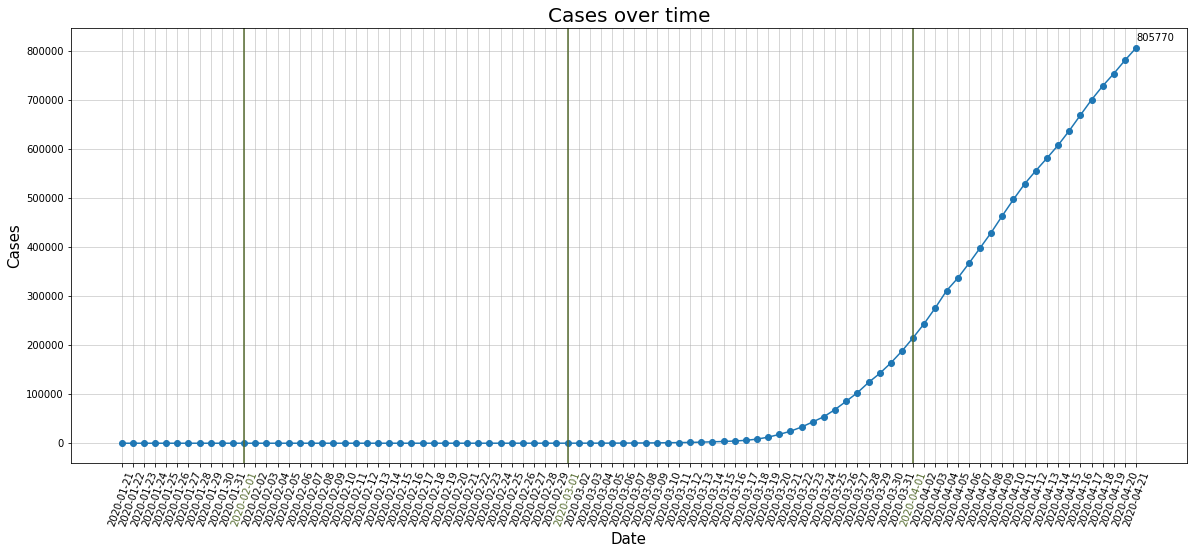

In [ ]:
case2 = covidCase.groupby('date').agg('sum')
case2.reset_index(inplace=True)
case2[['date', 'cases']]

fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(axis='x', rotation=70)
ax.plot(case2['date'], case2['cases'], 'o-')
#annotate max value
ymax = max(case2['cases'])
xmax = case2.iloc[case2['cases'].idxmax]['date']
plt.annotate(str(ymax), xy=(xmax, ymax), xytext=(0,7), textcoords='offset points')
#for a,b in zip(case4['date'], case4['cases']): 
#    plt.annotate(str(b), xy=(a, b), xytext=(0,5), textcoords='offset points')

ax.set_title('Cases over time', fontsize=20)
ax.set_ylabel('Cases', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
#draw vertical line for every new months
feb = case2[case2['date']=='2020-02-01'].index.values.astype(int)[0]
mar = case2[case2['date']=='2020-03-01'].index.values.astype(int)[0]
apr = case2[case2['date']=='2020-04-01'].index.values.astype(int)[0]
plt.axvline(x=feb, color='darkolivegreen')
plt.axvline(x=mar, color='darkolivegreen')
plt.axvline(x=apr, color='darkolivegreen')
ax.get_xticklabels()[feb].set_color("darkolivegreen")
ax.get_xticklabels()[mar].set_color("darkolivegreen")
ax.get_xticklabels()[apr].set_color("darkolivegreen")
plt.grid(linewidth=0.5)

There's a sharp rise after 19th of March till now!

## Total Deaths over time

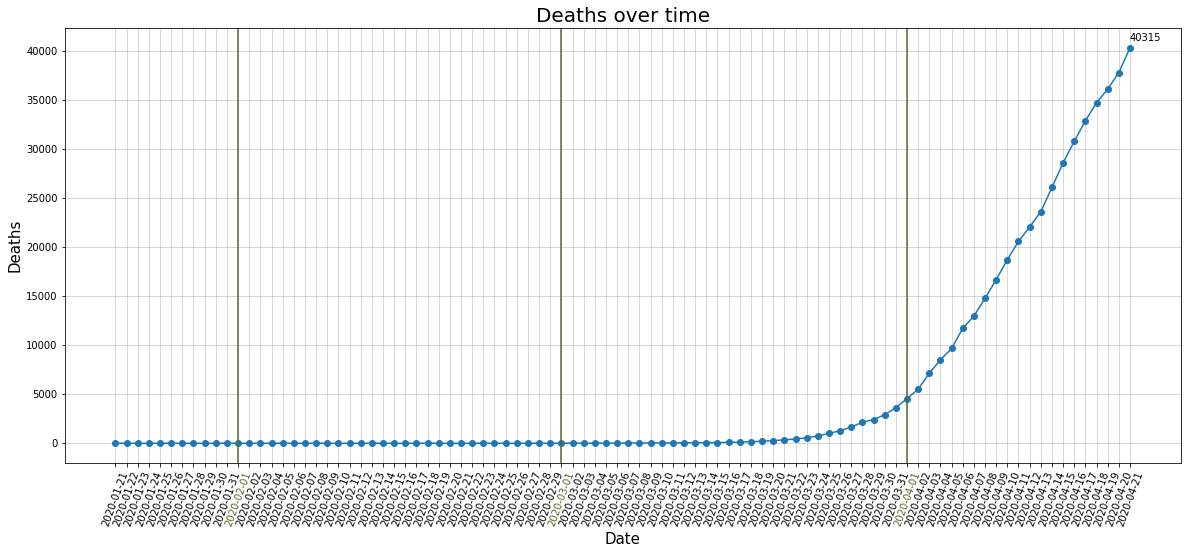

In [ ]:
case2[['date', 'deaths']]

fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(axis='x', rotation=70)
ax.plot(case2['date'], case2['deaths'], 'o-')
#annotate max value
ymax = max(case2['deaths'])
xmax = case2.iloc[case2['deaths'].idxmax]['date']
plt.annotate(str(ymax), xy=(xmax, ymax), xytext=(0,7), textcoords='offset points')
#for a,b in zip(case4['date'], case4['cases']): 
#    plt.annotate(str(b), xy=(a, b), xytext=(0,5), textcoords='offset points')

ax.set_title('Deaths over time', fontsize=20)
ax.set_ylabel('Deaths', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
#draw vertical line for every new months
feb = case2[case2['date']=='2020-02-01'].index.values.astype(int)[0]
mar = case2[case2['date']=='2020-03-01'].index.values.astype(int)[0]
apr = case2[case2['date']=='2020-04-01'].index.values.astype(int)[0]
plt.axvline(x=feb, color='darkolivegreen')
plt.axvline(x=mar, color='darkolivegreen')
plt.axvline(x=apr, color='darkolivegreen')
ax.get_xticklabels()[feb].set_color("darkolivegreen")
ax.get_xticklabels()[mar].set_color("darkolivegreen")
ax.get_xticklabels()[apr].set_color("darkolivegreen")
plt.grid(linewidth=0.5)

As the number of infections increased, so did the number of deaths, and there's a sharp rise after 23th of March til now

## Total Cases per State

In [ ]:
case3 = covidCase[covidCase['date'] == newest_date]

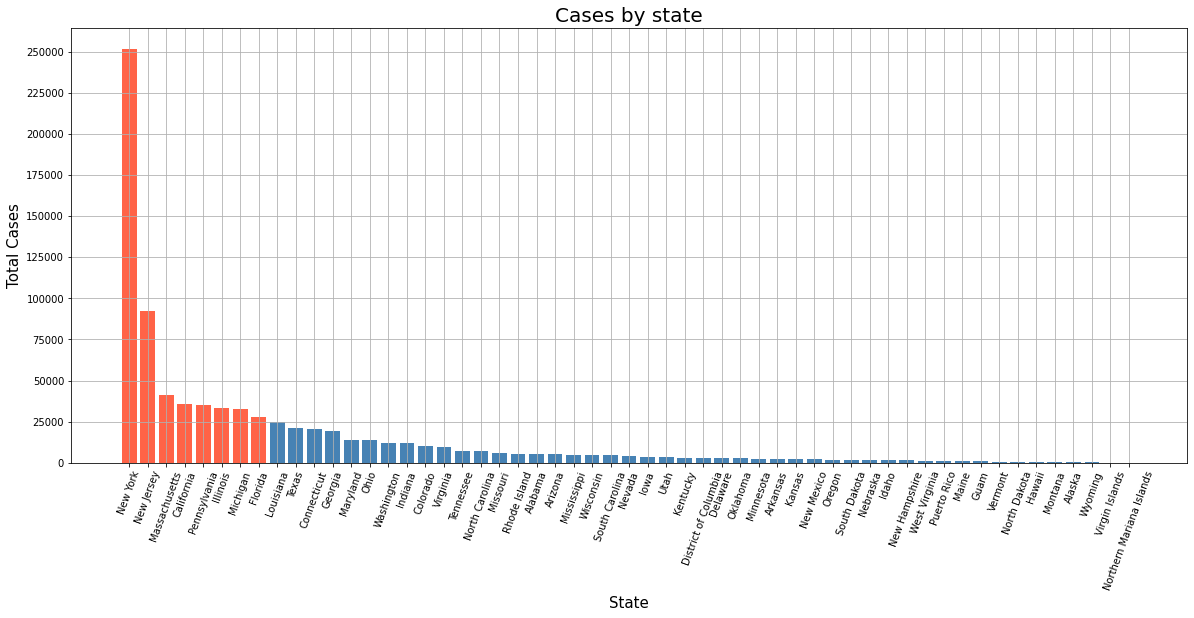

In [ ]:
case4 = case3.groupby('state').agg('sum').sort_values('cases', ascending=False)
case4.reset_index(inplace=True)
case4[['state', 'cases']].head(10)

fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(axis='x', rotation=70)
ax.bar(case4['state'], case4['cases'], color=(case4['cases'] < 25000).map({True: 'steelblue',
                                                                          False: 'tomato'}))
ax.set_title('Cases by state', fontsize=20)
ax.set_ylabel('Total Cases', fontsize=15)
ax.set_xlabel('State', fontsize=15)
y_max_cases = case4['cases'].max()+1000
plt.yticks(np.arange(0, y_max_cases, step=25000))
plt.grid()

From the above data, the top three cities which have the most case are New York, New Jersey and Massachusetts. 


## Total Deaths per State

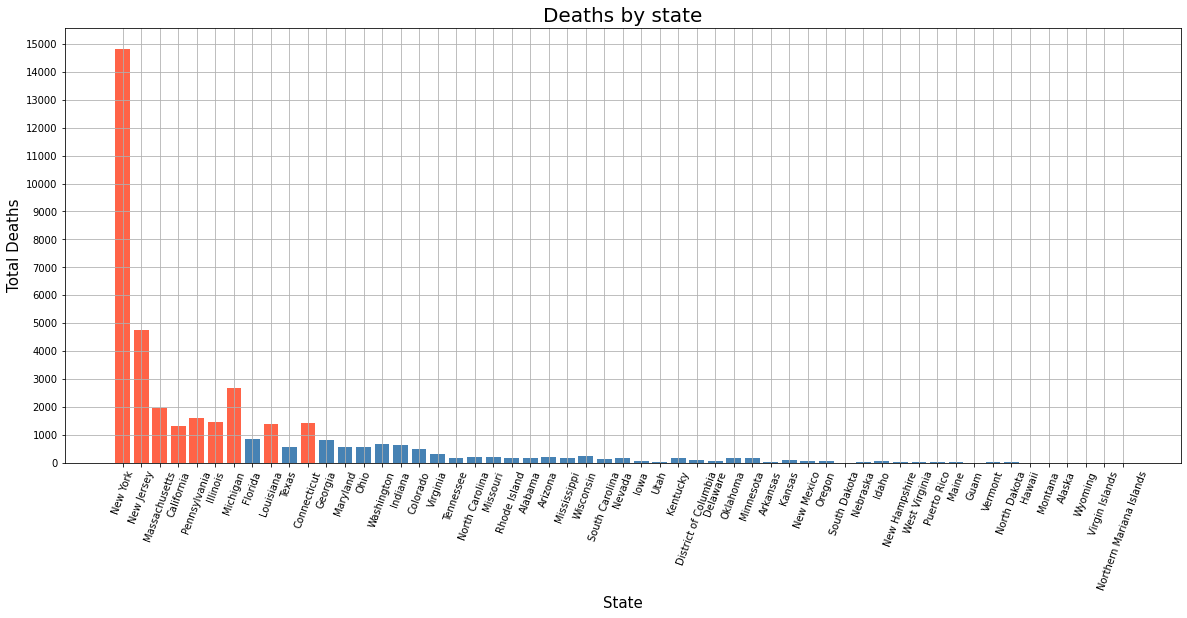

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(axis='x', rotation=70)
ax.bar(case4['state'], case4['deaths'], color=(case4['deaths'] < 1000).map({True: 'steelblue',
                                                                          False: 'tomato'}))
ax.set_title('Deaths by state', fontsize=20)
ax.set_ylabel('Total Deaths', fontsize=15)
ax.set_xlabel('State', fontsize=15)
y_max_deaths = case4['deaths'].max()+1000
plt.yticks(np.arange(0, y_max_deaths, step=1000))
plt.grid()

the top three cities with the highest death are New York, New Jersey and Michigan. 

## Daily new Cases

In [ ]:
case5 = covidCase.groupby('date').agg('sum')

case5['cases_daily'] = case5['cases'] - case5['cases'].shift(1)
case5['deaths_daily'] = case5['deaths'] - case5['deaths'].shift(1)
case5['cases_daily'].fillna('0', inplace=True)
case5['deaths_daily'].fillna('0', inplace=True)
case5['cases_daily'] = case5['cases_daily'].astype('int64')
case5['deaths_daily'] = case5['deaths_daily'].astype('int64')
case5.reset_index(inplace=True)
case5[['date', 'cases_daily']]

,date,cases_daily
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,1
4,2020-01-25,1
...,...,...
87,2020-04-17,31317
88,2020-04-18,28187
89,2020-04-19,25270
90,2020-04-20,27123


## Most infectious Day

In [ ]:
most_infectious_day = case5.groupby('date').agg('sum').sort_values('cases_daily', ascending=False)
most_infectious_day.reset_index(inplace=True)
most_infectious_day[['date', 'cases_daily']].head(1)


,date,cases_daily
0,2020-04-04,34641


## Mortality Rate


In [ ]:
mortality_rate = case1['deaths']/case1['cases']*100
mortality_rate

0    5.003289
dtype: float64

## Mortality Rate by States



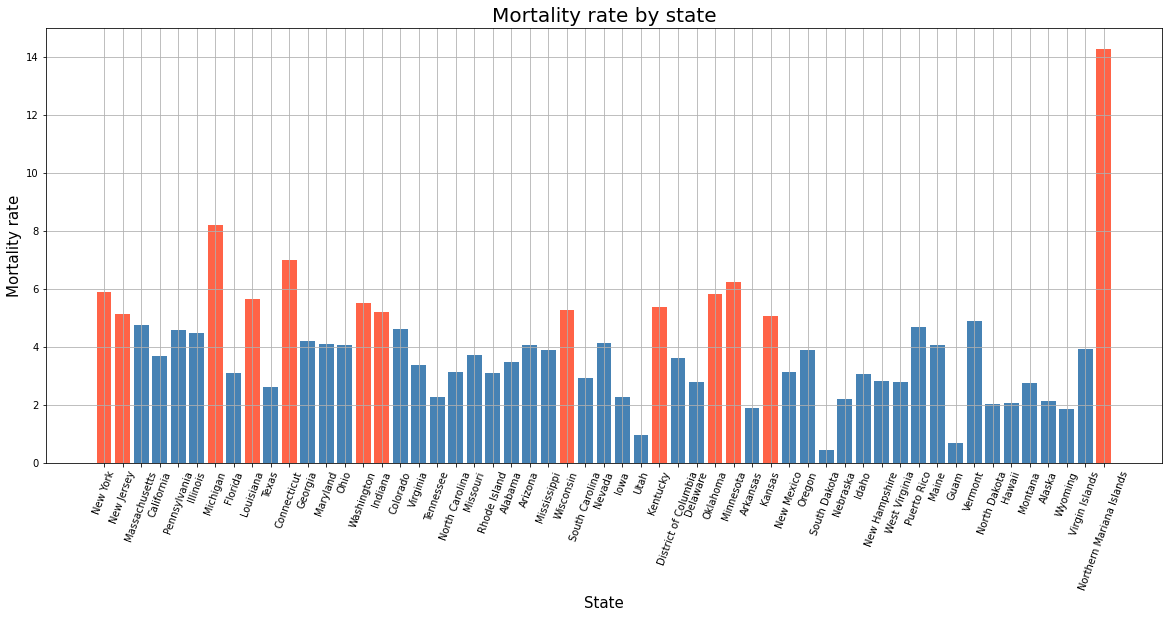

In [ ]:
case4['mortality rate'] = round((case4['deaths']/case4['cases'])*100, 2)
case4[['state', 'mortality rate']].head(10)

fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(axis='x', rotation=70)
ax.bar(case4['state'], case4['mortality rate'], color=(case4['mortality rate'] < 5).map({True: 'steelblue',
                                                                          False: 'tomato'}))
ax.set_title('Mortality rate by state', fontsize=20)
ax.set_ylabel('Mortality rate', fontsize=15)
ax.set_xlabel('State', fontsize=15)
plt.grid()

In [ ]:
case4['mortality rate'] = round((case4['deaths']/case4['cases'])*100, 2)
case4[['state', 'mortality rate']].tail(1)

,state,mortality rate
54,Northern Mariana Islands,14.29


Northern Mariana islands have the highest mortality in the U.S., it's 14.29